In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import os
import nltk as nltk
import textblob as TextBlob
import datetime as dt 

In [2]:
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
import warnings
warnings.filterwarnings('ignore')

In [3]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/tylergehbauer/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tylergehbauer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tylergehbauer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tylergehbauer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/tylergehbauer/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/tylergehbauer/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [4]:
#Create a function to read files for the Ticker Symbol

def read_file(TKR): 
    """ # Function to read file and store the output of the file content into a dictionary
         :param filename - Ticker symbol of company. Assumption is that the filename is stored as TKR.csv

    """
    filename='../Data/'+TKR+'.csv' #might have to change 
    
    movie_reviews= pd.read_csv(filename,parse_dates=True,usecols=np.r_[3,9:11])
            
    return movie_reviews

In [5]:
#Read Netflix Data
movie_reviews_UNI=read_file('universal')
movie_reviews_UNI.head()

critics_consensus original_release_date  \
0  More mild than wild. This tween comedy mess fa...             8/14/2008   
1  Only loosely based on the original TV series, ...              6/5/2009   
2  Michael Mann's latest is a competent and techn...              7/1/2009   
3  Repo Men has an intriguing premise, as well as...             3/19/2010   
4  Proving once again that build-up is the key to...             3/28/1963   

  streaming_release_date  
0              2/12/2014  
1             12/10/2015  
2             12/10/2015  
3              2/12/2014  
4              10/1/2014

In [6]:
movie_reviews_UNI = movie_reviews_UNI[movie_reviews_UNI['original_release_date'].notna()]
movie_reviews_UNI = movie_reviews_UNI[movie_reviews_UNI['critics_consensus'].notna()]

[]

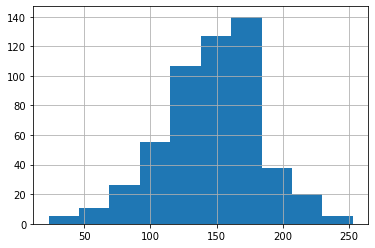

In [7]:
#Length of each comment
movie_reviews_UNI['critics_consensus'].str.len().hist().plot(kind='bar')
#Graph shows that range is between 125 and 200 characters. So we should use modules which are effective for small document size.


In [8]:
#Convert Dates from object to datetime
movie_reviews_UNI[["original_release_date", "streaming_release_date"]] = movie_reviews_UNI[["original_release_date", "streaming_release_date"]].apply(pd.to_datetime)



In [9]:
# Obtain Keys to connect to ALPACA API
load_dotenv() # True
CONSUMER_KEY = os.environ.get("ALPACA_API_KEY")

CONSUMER_SECRET_KEY = os.environ.get("ALPACA_SECRET_KEY")
#quandl.ApiConfig.api_key = os.environ.get("QUANTA_API_KEY")

In [10]:
# Initialize ALPACA API
ALPACA_URL='https://paper-api.alpaca.markets'
alpaca_api = tradeapi.REST(CONSUMER_KEY, CONSUMER_SECRET_KEY, ALPACA_URL, api_version='v2')

In [11]:
# Call ALPACA API to get data for ticker symbols.
# Format current date as ISO format

NY = 'America/New_York'

edate = dt.date.today()
start=pd.Timestamp('2010-01-01', tz=NY).isoformat()
end=pd.Timestamp(edate, tz=NY).isoformat()
# Set the tickers
tickers = ["CMCSA"]
# Set timeframe to '1D' for Alpaca API, 
# Get current closing prices for SPY and Ticker 
# (use a limit=1000 parameter to call the most recent 1000 days of data)
alpaca_api.get_bars(tickers, '1D', start=start, end=end, limit=2000).df

open   high      low  close    volume  \
timestamp                                                           
2015-12-01 05:00:00+00:00  61.46  61.78  61.2400  61.75   7853113   
2015-12-02 05:00:00+00:00  61.53  61.74  60.3397  60.48   9275457   
2015-12-03 05:00:00+00:00  60.39  60.81  59.3200  59.62  11628638   
2015-12-04 05:00:00+00:00  59.60  61.08  59.4900  60.75  12229492   
2015-12-07 05:00:00+00:00  60.57  60.95  59.8700  60.37   7169001   
...                          ...    ...      ...    ...       ...   
2022-05-04 04:00:00+00:00  40.48  41.69  40.1900  41.62  26948009   
2022-05-05 04:00:00+00:00  41.08  41.60  40.0400  40.38  30150663   
2022-05-06 04:00:00+00:00  40.25  40.42  39.4700  40.00  36329008   
2022-05-09 04:00:00+00:00  40.00  40.39  39.5900  39.76  36291324   
2022-05-10 04:00:00+00:00  40.30  41.05  39.9450  40.30  31136732   

                           trade_count       vwap symbol  
timestamp                                                 
2015-12-01 05:00:00+00:00        52877  61.578948  CMCSA  
2015-12-02 05:00:00+00:00        60502  60.841053  CMCSA  
2015-12-03 05:00:00+00:00        77994  59.825207  CMCSA  
2015-12-04 05:00:00+00:00        74520  60.553185  CMCSA  
2015-12-07 05:00:00+00:00        50685  60.185381  CMCSA  
...                                ...        ...    ...  
2022-05-04 04:00:00+00:00       155592  41.008271  CMCSA  
2022-05-05 04:00:00+00:00       197515  40.538915  CMCSA  
2022-05-06 04:00:00+00:00       224784  39.933899  CMCSA  
2022-05-09 04:00:00+00:00       240384  39.947653  CMCSA  
2022-05-10 04:00:00+00:00       224766  40.311793  CMCSA  

[1622 rows x 8 columns]

In [12]:
#Create dataframe to store API output
UNI_DF=alpaca_api.get_bars(tickers, '1D', start=start, end=end, limit=3000).df
UNI_DF.head()

open   high      low  close    volume  \
timestamp                                                           
2015-12-01 05:00:00+00:00  61.46  61.78  61.2400  61.75   7853113   
2015-12-02 05:00:00+00:00  61.53  61.74  60.3397  60.48   9275457   
2015-12-03 05:00:00+00:00  60.39  60.81  59.3200  59.62  11628638   
2015-12-04 05:00:00+00:00  59.60  61.08  59.4900  60.75  12229492   
2015-12-07 05:00:00+00:00  60.57  60.95  59.8700  60.37   7169001   

                           trade_count       vwap symbol  
timestamp                                                 
2015-12-01 05:00:00+00:00        52877  61.578948  CMCSA  
2015-12-02 05:00:00+00:00        60502  60.841053  CMCSA  
2015-12-03 05:00:00+00:00        77994  59.825207  CMCSA  
2015-12-04 05:00:00+00:00        74520  60.553185  CMCSA  
2015-12-07 05:00:00+00:00        50685  60.185381  CMCSA

In [13]:
UNI_DF['Daily Return'] = UNI_DF['close'].pct_change(1)
UNI_DF.head()

open   high      low  close    volume  \
timestamp                                                           
2015-12-01 05:00:00+00:00  61.46  61.78  61.2400  61.75   7853113   
2015-12-02 05:00:00+00:00  61.53  61.74  60.3397  60.48   9275457   
2015-12-03 05:00:00+00:00  60.39  60.81  59.3200  59.62  11628638   
2015-12-04 05:00:00+00:00  59.60  61.08  59.4900  60.75  12229492   
2015-12-07 05:00:00+00:00  60.57  60.95  59.8700  60.37   7169001   

                           trade_count       vwap symbol  Daily Return  
timestamp                                                               
2015-12-01 05:00:00+00:00        52877  61.578948  CMCSA           NaN  
2015-12-02 05:00:00+00:00        60502  60.841053  CMCSA     -0.020567  
2015-12-03 05:00:00+00:00        77994  59.825207  CMCSA     -0.014220  
2015-12-04 05:00:00+00:00        74520  60.553185  CMCSA      0.018953  
2015-12-07 05:00:00+00:00        50685  60.185381  CMCSA     -0.006255

<AxesSubplot:xlabel='timestamp'>

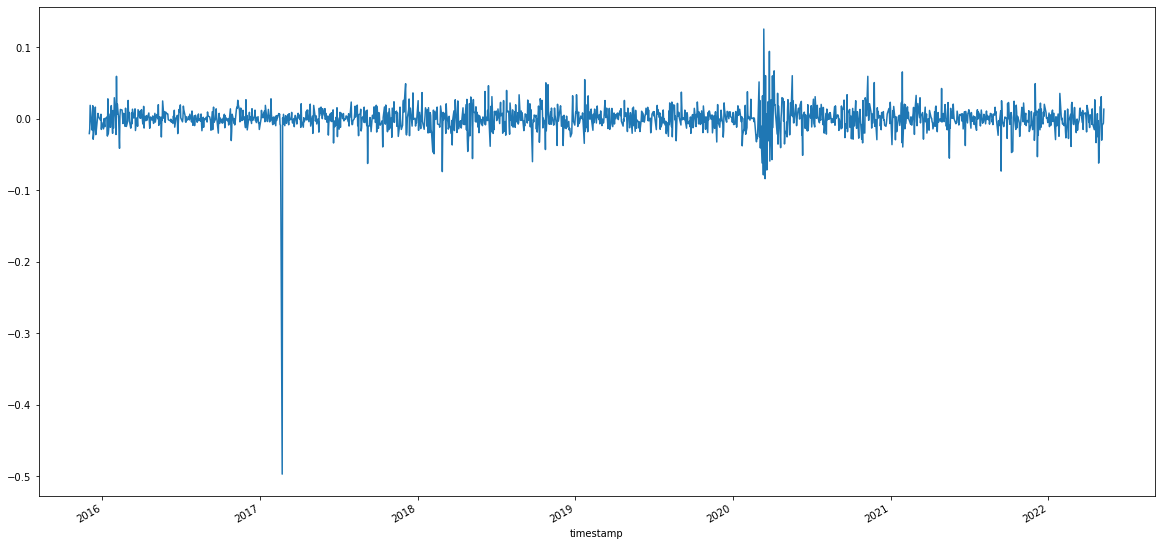

In [14]:
# Plot daily returns 
UNI_DF['Daily Return'].plot(figsize=(20, 10))

<AxesSubplot:xlabel='timestamp'>

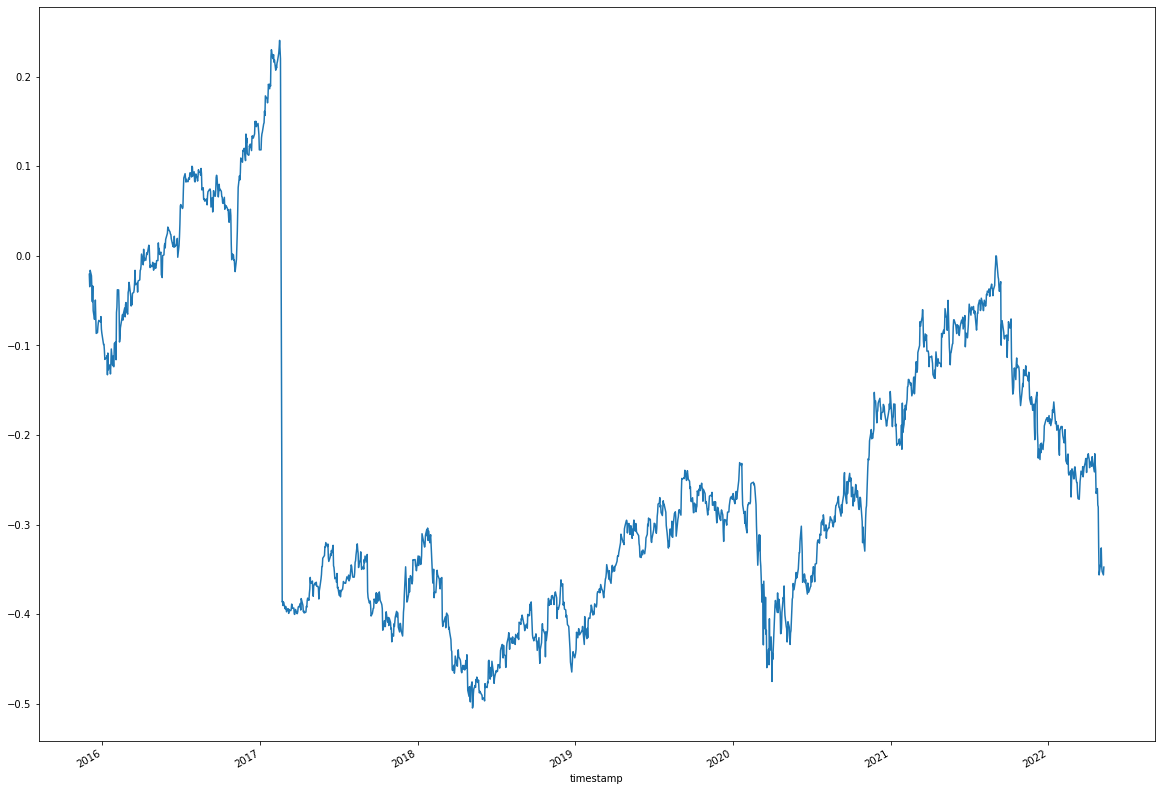

In [15]:
# Calculate cumulative returns 

# Plot cumulative returns
((UNI_DF['Daily Return'] + 1).cumprod() - 1).plot(figsize=(20, 15))

<AxesSubplot:xlabel='timestamp'>

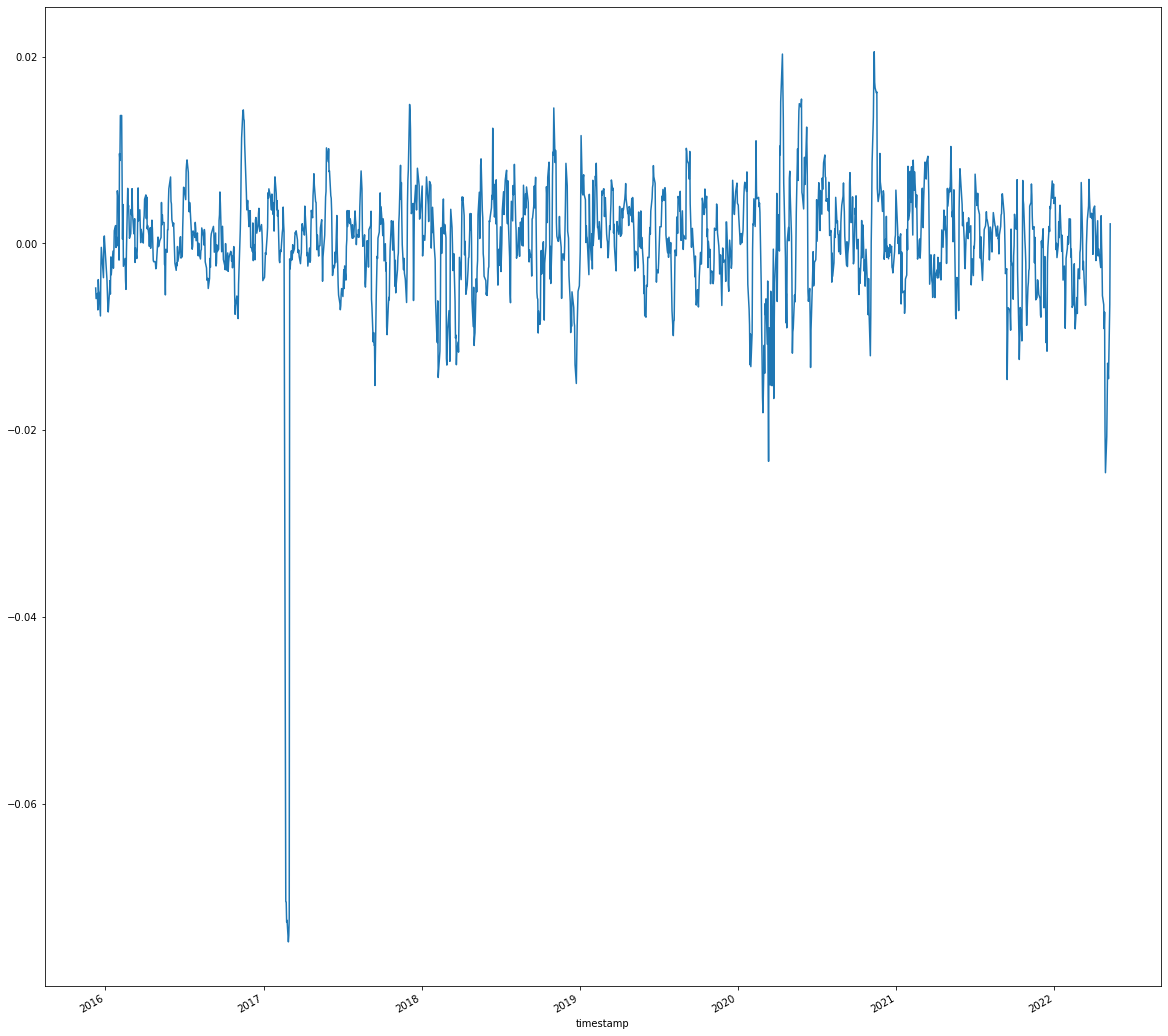

In [16]:
# Plot a rolling 7-day mean of DIS_DF's Daily Return
UNI_DF['Daily Return'].rolling(window = 7).mean().plot(figsize=(20, 20))

##### Back to NLP, we will generate Sentiment polarity score using a new library FLAIR

In [17]:
import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-05-10 19:39:00,373 loading file /Users/tylergehbauer/.flair/models/sentiment-en-mix-distillbert_4.pt


In [19]:
# we will append probability and sentiment preds later
probs = []
sentiments = []

for comment in movie_reviews_UNI['critics_consensus_spacytext'].to_list():
    # make prediction
    sentence = flair.data.Sentence(comment)
    sentiment_model.predict(sentence)
    # extract sentiment prediction
    probs.append(sentence.labels[0].score)  # numerical score 0-1
    sentiments.append(sentence.labels[0].value)  # 'POSITIVE' or 'NEGATIVE'

# add probability and sentiment predictions to tweets dataframe
movie_reviews_UNI['Flair_Score_draft'] = probs
movie_reviews_UNI['sentiment_flair'] = sentiments

In [20]:
# Convert the Flair score to show the sign of the value.
movie_reviews_UNI['Flair_Score']= movie_reviews_UNI['sentiment_flair'].apply(lambda x: '-' if (x == 'NEGATIVE') else '') 

movie_reviews_UNI['Flair_Score'] = movie_reviews_UNI['Flair_Score'] + movie_reviews_UNI['Flair_Score_draft'].astype(str)
movie_reviews_UNI['Flair_Score'] = pd.to_numeric(movie_reviews_UNI['Flair_Score'], errors='coerce')

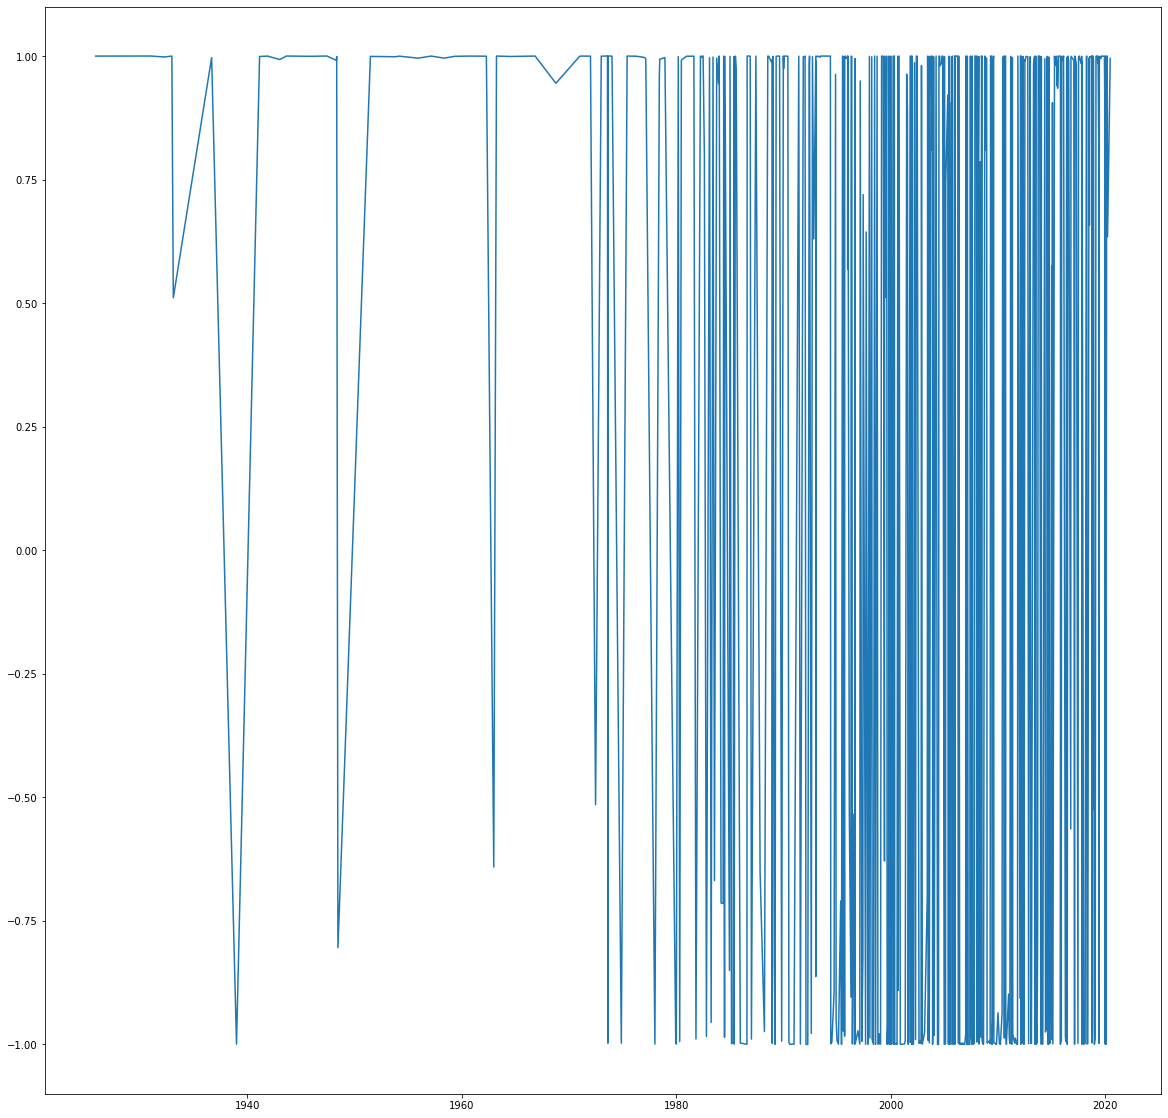

In [23]:
# Plot spacy cleaned critic_consensus score with time
#movie_reviews_UNI['probabilityS-spacy'] .plot(figsize=(20, 20))
movie_reviews_UNI = movie_reviews_UNI.sort_values('original_release_date', ascending=True)
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(movie_reviews_UNI['original_release_date'], movie_reviews_UNI['Flair_Score'])

In [30]:
#Compare with VADER
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiments_uni = []#creates empty list

#Going to use VADER’s SentimentIntensityAnalyzer() to see how many 'Neutral (neu)' , 'Positive (pos)', and 'Negatvie(neg)'
# words there are for each article. 
for articles in movie_reviews_UNI['critics_consensus_spacytext']: #goes through each artilce in df and applies polarity
    try:
        text = articles #accessing each articles 'content' which contains the article itself in 'bitcoin_news'
        results = analyzer.polarity_scores(text) #this is how get compound, pos, neg, and nue polarity scores
        #during imports we set analyzer equal to SentimentIntensityAnalyzer() 
        #'results' uses this function to find polarity score for each article in bitcoin_news
        compound = results["compound"] #gets compound polarity score
        pos = results["pos"] #gets postive polarity score
        neu = results["neu"] #gets neutral polarity score
        neg = results["neg"] #gets negative polarity score

        sentiments_uni.append({
            "text": text,
            "NLTK_Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        }) #appends a dictionary inside the list-(sentiments) so a dataframe can be created
        #this appends all polarity score we got above
    except AttributeError:
        pass
#rinse and repeat for each article    
universal = pd.DataFrame(sentiments_uni)#creates a dataframe using the list of dicts
#netflix = netflix.join(netflix_df['movie_title'])
#netflix = netflix.join(netflix_df['original_release_date'])
#netflix = netflix.join(netflix_df['streaming_release_date'])
movie_reviews_UNI=movie_reviews_UNI.join(universal['NLTK_Compound'])
#netflix = netflix.drop(columns = ['Positive', 'Negative', 'Neutral'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tylergehbauer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
movie_reviews_UNI.head()

critics_consensus original_release_date  \
33   Decades later, it still retains its ability to...            1925-11-15   
13   Bela Lugosi's timeless portrayal of Dracula in...            1931-01-01   
35   This Scarface foregoes his "little friend" and...            1932-04-09   
29   Relying more on mood and atmosphere than the t...            1932-12-22   
623  She Done Him Wrong, but putting Cary Grant and...            1933-02-09   

    streaming_release_date  Flair_Score_draft sentiment_flair  Flair_Score  \
33              2016-11-10           0.999843        POSITIVE     0.999843   
13              2014-02-12           0.999975        POSITIVE     0.999975   
35              2012-07-03           0.998047        POSITIVE     0.998047   
29              2016-04-19           0.999911        POSITIVE     0.999911   
623             2015-09-10           0.510723        POSITIVE     0.510723   

     NLTK_Compound  
33          0.4215  
13          0.8885  
35          0.1012  
29         -0.4019  
623            NaN

In [46]:
#Check TextBlob Sentiment score too
#movie_reviews_DIS['score_txtblob'] = movie_reviews_DIS['critics_consensus_spacytext'].apply(lambda Text: TextBlob(Text).sentiment)
movie_reviews_UNI[['score_txtblob','subj_txtblob']] = movie_reviews_UNI['critics_consensus_spacytext'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

TypeError: 'module' object is not callable

In [31]:
#We will use ADH Test on Netflix daily returns 
UNI_DF = UNI_DF[UNI_DF['Daily Return'].notna()]
# Daily Returns
from statsmodels.tsa.stattools import adfuller


# ADF Test
result = adfuller(UNI_DF['Daily Return'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    


ADF Statistic: -28.597693254281037
p-value: 0.0
Critial Values:
   1%, -3.434395520959224
Critial Values:
   5%, -2.8633268625511046
Critial Values:
   10%, -2.5677212878453477


In [32]:
#Since the series is stationaru, we will now apply the Granger Causality test.
#### Data Preprocessing for test
#1. Form both data sets matching the same dates
#2. Merge the resulting data frames on date.

# Netflix critic comment data pre-processing
# We will use Flair score 
UNI_mov_df=movie_reviews_UNI[['original_release_date','Flair_Score']]

# Netflix daily return pre-processing
UNI_DF.reset_index(inplace=True)
uni_stk_df=UNI_DF[['timestamp','Daily Return']]
uni_stk_df['date']=uni_stk_df['timestamp'].dt.date
#Convert Dates from object to datetime
uni_stk_df[["date"]] = uni_stk_df[["date"]].apply(pd.to_datetime)
uni_stk_df.drop('timestamp', axis=1, inplace=True) 
uni_stk_df = uni_stk_df[['date', 'Daily Return']]

In [33]:
display(UNI_mov_df)

display(uni_stk_df)

original_release_date  Flair_Score
33             1925-11-15     0.999843
13             1931-01-01     0.999975
35             1932-04-09     0.998047
29             1932-12-22     0.999911
623            1933-02-09     0.510723
..                    ...          ...
274            2020-01-17    -0.999996
713            2020-02-14     0.999961
701            2020-02-28     0.999655
698            2020-03-13     0.634238
703            2020-06-12     0.994976

[534 rows x 2 columns]

date  Daily Return
0    2015-12-02     -0.020567
1    2015-12-03     -0.014220
2    2015-12-04      0.018953
3    2015-12-07     -0.006255
4    2015-12-08     -0.013749
...         ...           ...
1616 2022-05-04      0.030964
1617 2022-05-05     -0.029793
1618 2022-05-06     -0.009411
1619 2022-05-09     -0.006000
1620 2022-05-10      0.013581

[1621 rows x 2 columns]

In [34]:
# Join the two dataframes
Final_df = pd.merge(UNI_mov_df, uni_stk_df, how="inner", left_on="original_release_date", right_on="date").drop(["date"], axis=1)
Final_df.set_index('original_release_date',inplace=True)

<AxesSubplot:xlabel='original_release_date'>

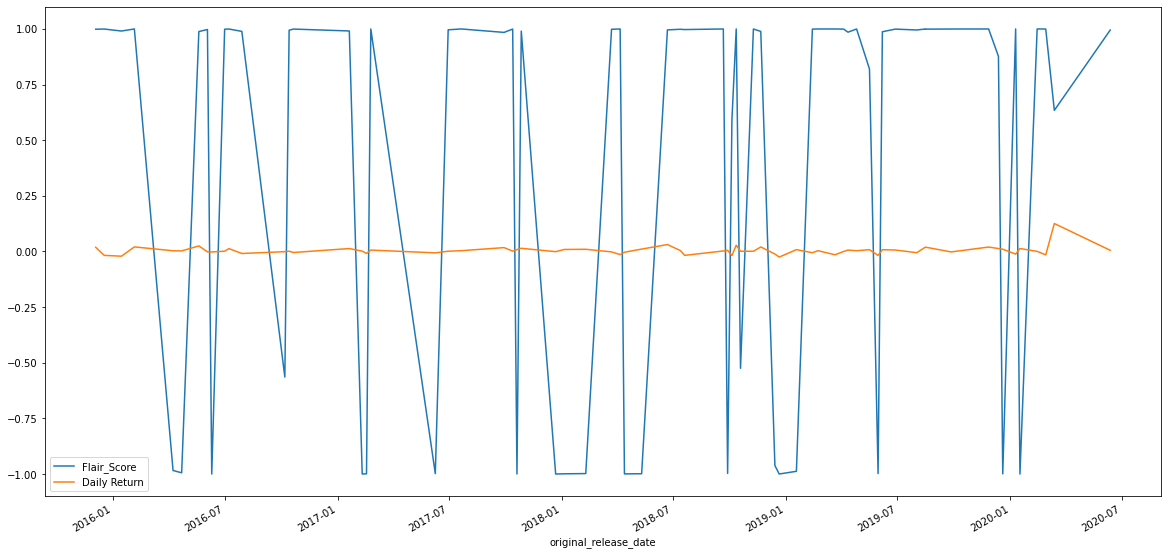

In [35]:
#Plot both columns against Release Date
Final_df.plot(figsize=(20, 10))

### Apply the Granger Casuality test



It accepts a 2D array with 2 columns as the main argument. The values are in the first column and the predictor (X)
is in the second column.

The Null hypothesis is: the series in the second column, does not Granger cause the series in the first. If the 
P-Values are less than a significance level (0.05) then you reject the null hypothesis and conclude that the said 
lag of X is indeed useful.

The second argument maxlag says till how many lags of Y should be included in the test.



In [36]:
from statsmodels.tsa.stattools import grangercausalitytests
#perform Granger-Causality test
grangercausalitytests(Final_df[['Daily Return', 'Flair_Score']], maxlag=[7])


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.5530  , p=0.1731  , df_denom=47, df_num=7
ssr based chi2 test:   chi2=14.3407 , p=0.0454  , df=7
likelihood ratio test: chi2=12.9004 , p=0.0746  , df=7
parameter F test:         F=1.5530  , p=0.1731  , df_denom=47, df_num=7


{7: ({'ssr_ftest': (1.5530242669829326, 0.17311376457097064, 47.0, 7),
   'ssr_chi2test': (14.340692167459421, 0.04544317213107229, 7),
   'lrtest': (12.900447206369563, 0.07457144725493352, 7),
   'params_ftest': (1.5530242669829444, 0.17311376457096675, 47.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [37]:
#Let us test after Normalizing the two columns using MinMax Scalar
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
Final_df[['Daily Return', 'Flair_Score']] = scaler.fit_transform(Final_df[['Daily Return', 'Flair_Score']])
Final_df.head()

Flair_Score  Daily Return
original_release_date                           
2015-12-04                0.998853     -0.415239
2015-12-18                0.999570     -0.898884
2016-01-15                0.990696     -0.946168
2016-02-05                0.999894     -0.393198
2016-04-08               -0.984140     -0.623445

<AxesSubplot:xlabel='original_release_date'>

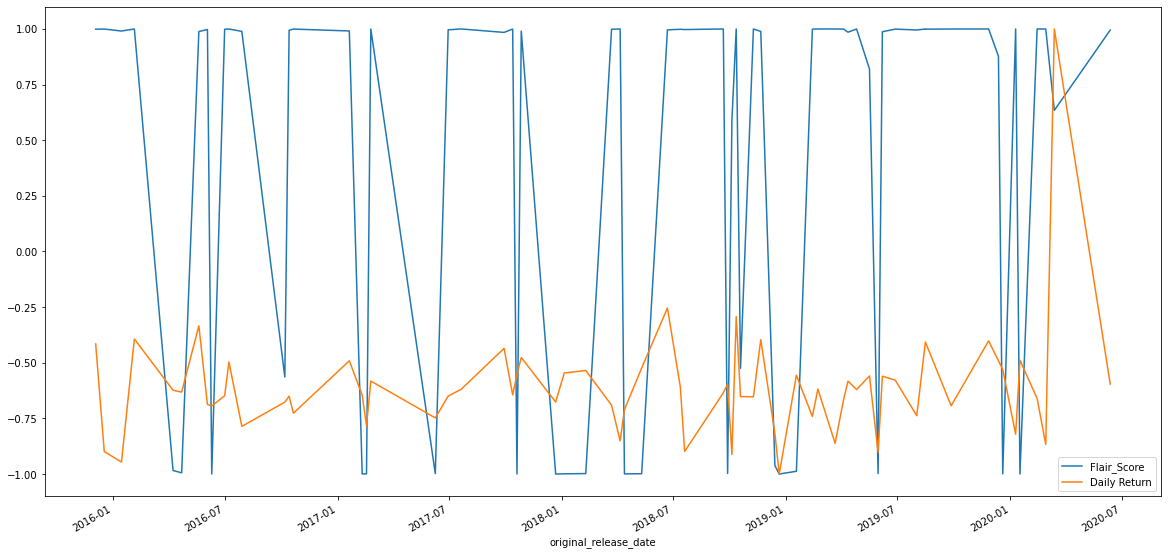

In [38]:
#Plot both columns against Release Date after scaling
Final_df.plot(figsize=(20, 10))

In [39]:
#Apply Granger Casuality test to scaled data
grangercausalitytests(Final_df[['Daily Return', 'Flair_Score']], maxlag=[7])


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.5530  , p=0.1731  , df_denom=47, df_num=7
ssr based chi2 test:   chi2=14.3407 , p=0.0454  , df=7
likelihood ratio test: chi2=12.9004 , p=0.0746  , df=7
parameter F test:         F=1.5530  , p=0.1731  , df_denom=47, df_num=7


{7: ({'ssr_ftest': (1.5530242669829337, 0.17311376457097016, 47.0, 7),
   'ssr_chi2test': (14.34069216745943, 0.04544317213107217, 7),
   'lrtest': (12.900447206369591, 0.0745714472549329, 7),
   'params_ftest': (1.5530242669829344, 0.17311376457096977, 47.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [40]:
# TXTBLOB DISNEY
#data frames for each score
UNI_mov_df_txtblob = movie_reviews_UNI[['original_release_date','score_txtblob']] #dataframe
UNI_mov_df_nltk = movie_reviews_UNI[['original_release_date','NLTK_Compound']] #dataframe



KeyError: "['score_txtblob'] not in index"

In [ ]:
# Join the stock and textblob score dataframes
Final_df_txtblob = pd.merge(UNI_mov_df_txtblob, uni_stk_df, how="inner", left_on="original_release_date", right_on="date").drop(["date"], axis=1)
Final_df_txtblob.set_index('original_release_date',inplace=True)

In [ ]:
#Join the stock and NLTK score
Final_df_nltk = pd.merge(uni_mov_df_nltk, uni_stk_df, how="inner", left_on="original_release_date", right_on="date").drop(["date"], axis=1)
Final_df_nltk.set_index('original_release_date',inplace=True)

In [ ]:
# plotting these
Final_df_txtblob.plot(figsize=(20, 10))

In [ ]:
#perform Granger-Causality test
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(Final_df_txtblob[['Daily Return', 'score_txtblob']], maxlag=[7])


In [ ]:
#### Conclusion
In the above case P-Value is indeed above 0.05 and hence we can assume that the critic comments do not impact stock value.

We should further test with different publishing company and much bigger dataset.